# In-class exercise for tutorial012
# Loops!

## Introduction

All of what we think of as "statistics" is based upon repeating an experiment an infinite number of times. But rather than actually repeating the experiment, a bunch of calculus is used, plus assumptions to get the math to work. It may not seem obvious, but when we have been doing something as simple as compute the width of a sampling distribution from a set of data as *s/sqrt(n)*, what we are really saying is:

"If we were to do this experiment an infinite number of times and make a distribution of the means from all the experiments, it would be a normal distribution and have a standard deviation of s/sqrt(n). (And, by the way, this formula is based on a bunch of math that we will never actually do!)"

One of the most important breakthroughs in statistics and data science was the realization that, with the repetition of a few simple operations (using computers), we can actually simulate experiments a "very large" number of times. And while it's true that "very large" is less then infinite, by using computers to repeat experiments many many times (say tenths of thousands), we free ourselves of the assumptions that had to made in order to get the math underlying traditional statistics to work!

But how would we simulate repeating an experiment a number of times over in code?

You guessed it... **with a `for` loop!**

---

### Load the data set

The data come from an online test of anxiety that – according to the sketchy website – was constructed such that the anxiety scores are **normally distributed** with a **mean of 50** and a **standard deviation of 10**.

Preliminaries of course...

In [25]:
import numpy as np
import seaborn as sns

Load the data file "datasets/012_anxiety_data.npy" (assuming you put the file in your "datasets" folder – otherwise adjust path as necessary. Reminder: `np.load()` is your friend!

In [9]:
ad = np.load("datasets/012_anxiety_data.npy")

Now let's make sure we know our data set, `real_data`, well. Let's 

* look at a histogram
* ditto with a kde
* compute the mean, median and standard deviation
* compute the standard error of the mean


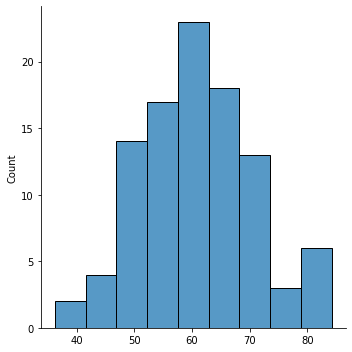

In [10]:
# histogram
sns.displot(ad)

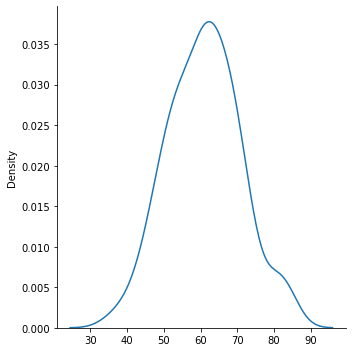

In [11]:
# kde
sns.displot(ad, kind='kde')

In [31]:
# mean, median and standard deviation
datamean = np.mean(ad)
datamedian = np.median(ad)
datasd = np.std(ad)
datasize = np.shape(ad)

print(datamean, datamedian, datasd, datasize)

60.971860226088445 61.00404975776776 9.789934489177513 (100,)


In [21]:
# standard error
dataerror = np.std(ad) / np.sqrt(np.size(ad))

print(dataerror)

0.9789934489177513


---

In a sentence or two of your own words, describe what the standard error of the mean is:

The standard error of the mean measures how much discrepancy there is likely to be in a sample’s mean compared with the population mean.

---

### Simulate a bunch of experimental replications

Imagine, we wanted to simulate many many repeates of the same experiments. Fpr examp,e imagine that we wanted to appreciate the variability of the data obtained in the experiments, under certain conditions of noise and variability in the data. 

How would we simulate a bunch of experiments? We obviously can't actually repeat the experiments in the real world. But, as data scientists, we do have a couple of options, both of which we can implement with `for` loops!

#### Monte Carlo Simulation

If we want to repeat the experment a bunch of times, let's consider what we know! We know that the website claims that:

* the scores are normally distributed
* they have a mean of 50
* and a standard deviation of 10

So we should be able to use `numpy.random.randn()` to generate numbers that meet the first critereon. Then we just have to scale the standard deviation up by 10 and set the mean to 50. Luckily, we know how to multiply (`*`) and add (`+`), respectively.

So here's our mission: 

* write a `for` loop that repeats `n_replications = 2000` times
* on each replication
    - compute the mean of the simulated experiment
    - store that mean in a `mc_means` numpy array
* do a histogram of the means
* make a kde also too
* compute the mean and standard deviation of the 2000 means
   - compare the "mean o' means" from your simulation with the data mean
   - compare the "standard deviation o' means" with the standard error of the data

The simulation via `for` loop:

In [36]:
import numpy as np
nReps = 2000
nRows, nCols = nReps,1
myArraysize = (nRows, nCols)
anArray = np.zeros(myArraysize)

claimedmean = 50
claimedsd = 10

for i in range(nRows) :
    ourNumbers = np.random.randn(100)
    ourNumbers = claimedmean + ourNumbers*claimedsd
    anArray[i,:] = np.mean(ourNumbers)

Histogram of the means:

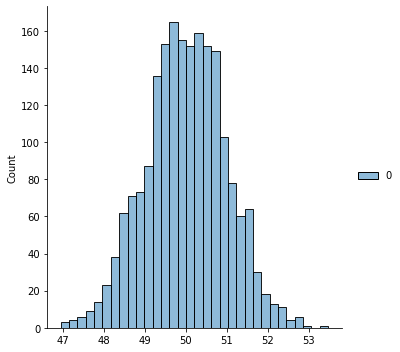

In [37]:
sns.displot(anArray)

KDE of the means

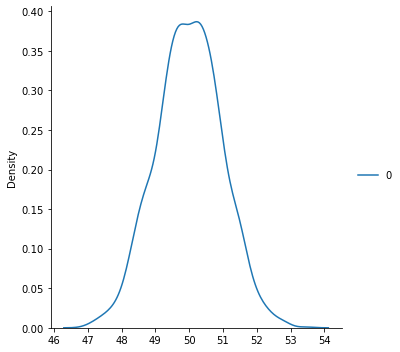

In [38]:
sns.displot(anArray, kind='kde')

Compute the mean value of your simulation means:

In [41]:
simMean = np.mean(anArray)
print(simMean)

49.9985077806162


Compare it with the original data mean:

The simulated mean is much lower than the original data mean, around 11 points lower (~50 vs ~61).

Compute the standard deviation of your simulation means:

In [43]:
simSD = np.std(anArray)
print(simSD)

0.9770790824475561


Compare it with the standard error you computed from the original data:

They are essentially the same! 0.977 & 0.978

---

##### Bonus (not required)
If you knocked the above out with time to spare – congratulations – and let's think about this: you not only have the information given above as clues to the true state of the world. You also have:

* the data themselves (or the histogram thereof that you made)
* the actual mean of the original data
* the actual standard deviation of the original data

So rather than do a simulation based on the claimed mean of the sketchy website, you could base a new simulation on the data you actually have!

Note that, if you wrote you code reasonably well above, you should only have to change the values of two variables to do this new simulation!

Proceed!